In [ ]:
# Author: Janssen Kotah
# snRNAseq analysis for WT/SHIP1 KO mice as part of Matera et al. project
# Code adapted from template by Thomas Rust, here adapted to save counts matrices separately for Scrublet analysis

In [23]:
library(dplyr)
library(patchwork)
library(ggplot2)
library(SoupX)
library(Seurat)
library(stringr)
library(DropletUtils)
sessionInfo()

R version 4.2.3 (2023-03-15)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Ubuntu 20.04.5 LTS

Matrix products: default
BLAS/LAPACK: /data/bcn/p310674/anaconda3/envs/R_env/lib/libopenblasp-r0.3.20.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats4    stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
 [1] DropletUtils_1.16.0         SingleCellExperiment_1.18.1
 [3] SummarizedExperiment_1.28.0 Biobase_2.58.0             
 [5] GenomicRanges_1.50.2        GenomeInfoDb_1.34.9        
 [7] IRanges_2.32.0              S4Vectors_0.36.0           
 [9] BiocGenerics_0.44.0         MatrixGene

In [5]:
#load in files from filtered CellRanger v7 outputs
input.dir = "~/../Datasets/240208_JKO_SHIP1_Project/20240229_Resequencing_CellRanger/output_v7/"
sample_folders = list.files(input.dir, pattern = "JK")
sample_folders


[1] "JK1-out" "JK2-out" "JK3-out" "JK4-out" "JK5-out" "JK6-out" "JK7-out"
[8] "JK8-out"

[1] "Analyzing sample: JK1-out"


Loading raw count data

Loading cell-only count data

Loading extra analysis data where available

312 genes passed tf-idf cut-off and 74 soup quantile filter.  Taking the top 74.

Using 298 independent estimates of rho.

Estimated global rho of 0.09

Warning message in sparseMatrix(i = out@i[w] + 1, j = out@j[w] + 1, x = out@x[w], :
“'giveCsparse' is deprecated; setting repr="T" for you”
Expanding counts from 17 clusters to 8087 cells.



[1] "Analyzing sample: JK2-out"


Loading raw count data

Loading cell-only count data

Loading extra analysis data where available

278 genes passed tf-idf cut-off and 44 soup quantile filter.  Taking the top 44.

Using 182 independent estimates of rho.

Estimated global rho of 0.06

Warning message in sparseMatrix(i = out@i[w] + 1, j = out@j[w] + 1, x = out@x[w], :
“'giveCsparse' is deprecated; setting repr="T" for you”
Expanding counts from 16 clusters to 8227 cells.



[1] "Analyzing sample: JK3-out"


Loading raw count data

Loading cell-only count data

Loading extra analysis data where available

463 genes passed tf-idf cut-off and 160 soup quantile filter.  Taking the top 100.

Using 546 independent estimates of rho.

Estimated global rho of 0.09



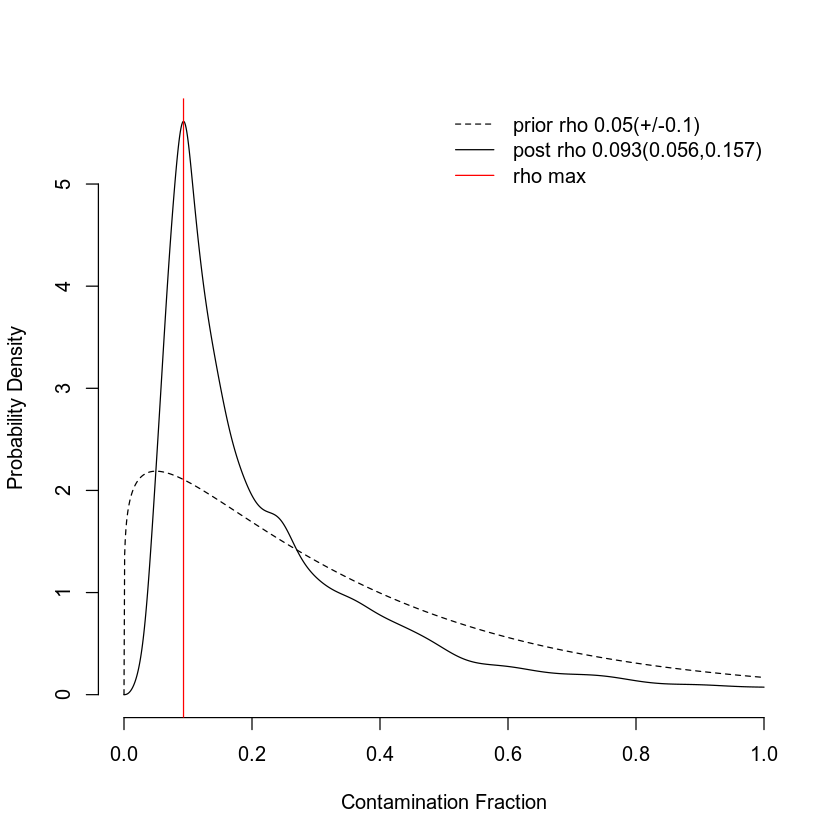

Warning message in sparseMatrix(i = out@i[w] + 1, j = out@j[w] + 1, x = out@x[w], :
“'giveCsparse' is deprecated; setting repr="T" for you”
Expanding counts from 18 clusters to 10399 cells.



[1] "Analyzing sample: JK4-out"


Loading raw count data

Loading cell-only count data

Loading extra analysis data where available

408 genes passed tf-idf cut-off and 121 soup quantile filter.  Taking the top 100.

Using 449 independent estimates of rho.

Estimated global rho of 0.04



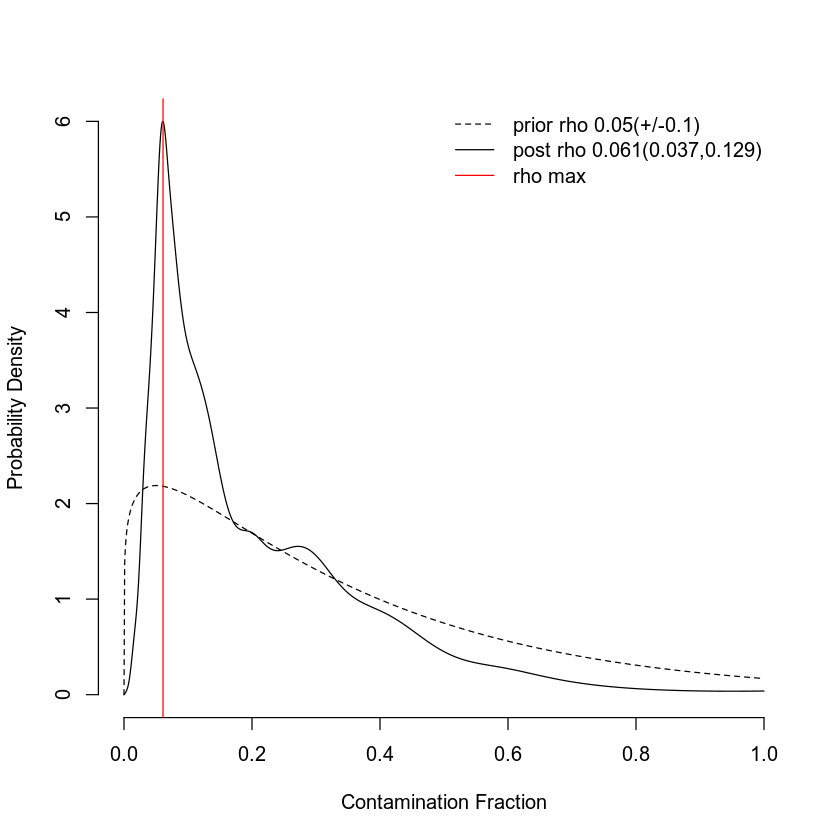

Warning message in sparseMatrix(i = out@i[w] + 1, j = out@j[w] + 1, x = out@x[w], :
“'giveCsparse' is deprecated; setting repr="T" for you”
Expanding counts from 14 clusters to 5840 cells.



[1] "Analyzing sample: JK5-out"


Loading raw count data

Loading cell-only count data

Loading extra analysis data where available

490 genes passed tf-idf cut-off and 143 soup quantile filter.  Taking the top 100.

Using 603 independent estimates of rho.

Estimated global rho of 0.04



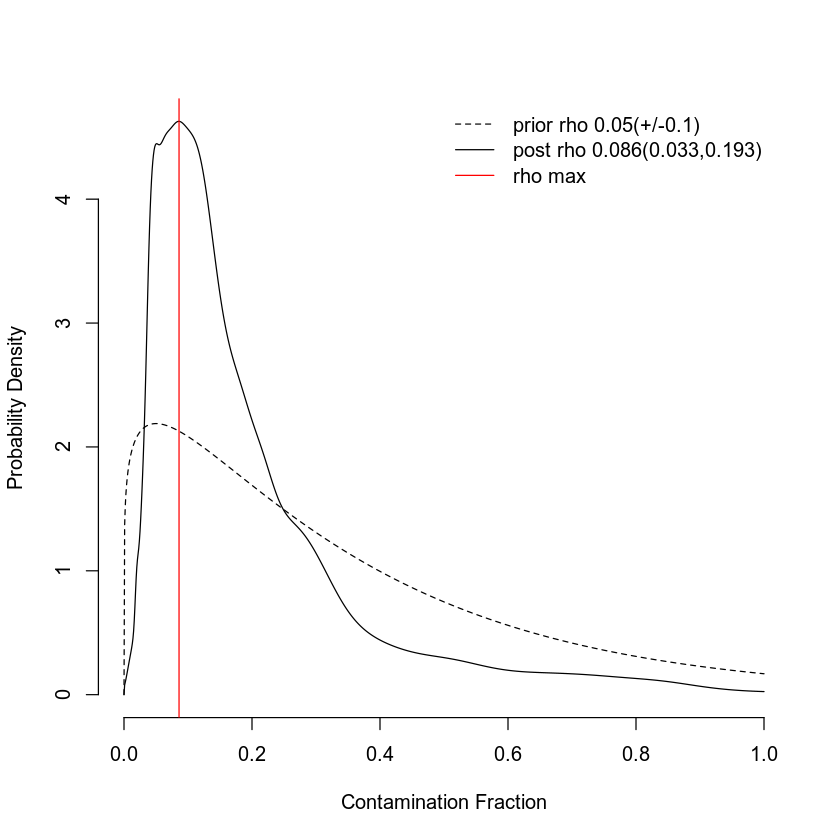

Warning message in sparseMatrix(i = out@i[w] + 1, j = out@j[w] + 1, x = out@x[w], :
“'giveCsparse' is deprecated; setting repr="T" for you”
Expanding counts from 18 clusters to 7129 cells.



[1] "Analyzing sample: JK6-out"


Loading raw count data

Loading cell-only count data

Loading extra analysis data where available

117 genes passed tf-idf cut-off and 54 soup quantile filter.  Taking the top 54.

Using 118 independent estimates of rho.

Estimated global rho of 0.04



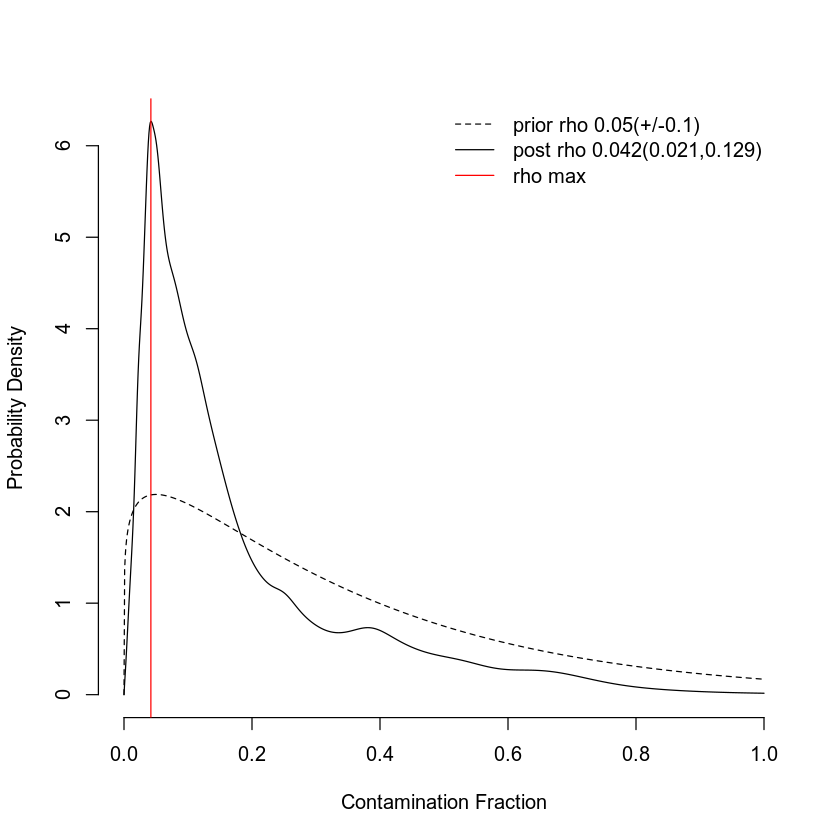

Warning message in sparseMatrix(i = out@i[w] + 1, j = out@j[w] + 1, x = out@x[w], :
“'giveCsparse' is deprecated; setting repr="T" for you”
Expanding counts from 12 clusters to 5817 cells.



[1] "Analyzing sample: JK7-out"


Loading raw count data

Loading cell-only count data

Loading extra analysis data where available

97 genes passed tf-idf cut-off and 22 soup quantile filter.  Taking the top 22.

Using 36 independent estimates of rho.

Estimated global rho of 0.02



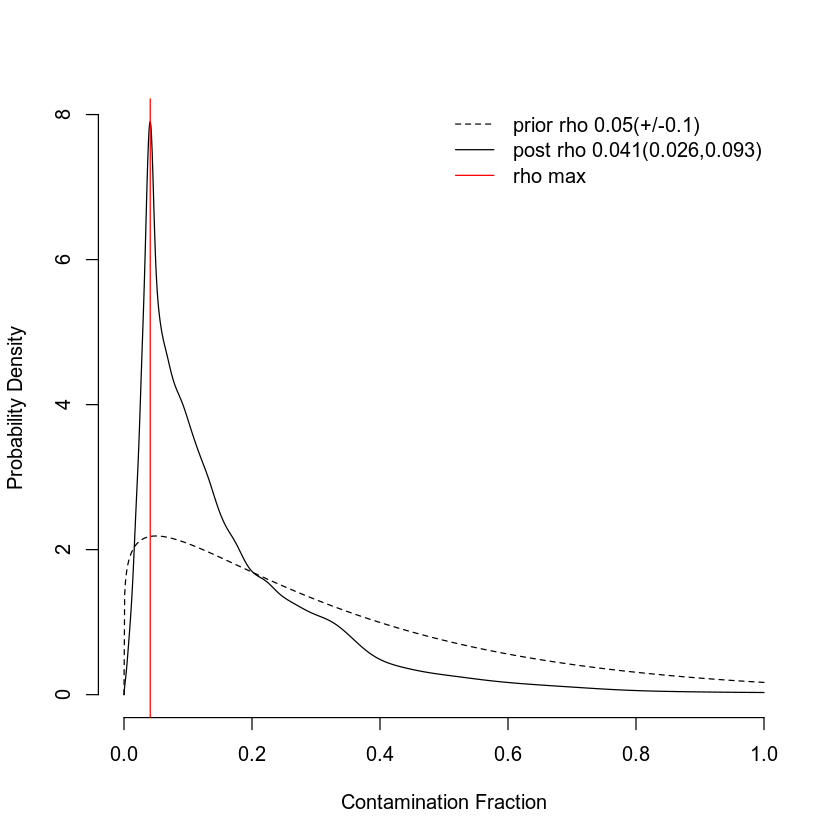

Warning message in sparseMatrix(i = out@i[w] + 1, j = out@j[w] + 1, x = out@x[w], :
“'giveCsparse' is deprecated; setting repr="T" for you”
Expanding counts from 5 clusters to 886 cells.



[1] "Analyzing sample: JK8-out"


Loading raw count data

Loading cell-only count data

Loading extra analysis data where available

120 genes passed tf-idf cut-off and 51 soup quantile filter.  Taking the top 51.

Using 141 independent estimates of rho.

Estimated global rho of 0.04



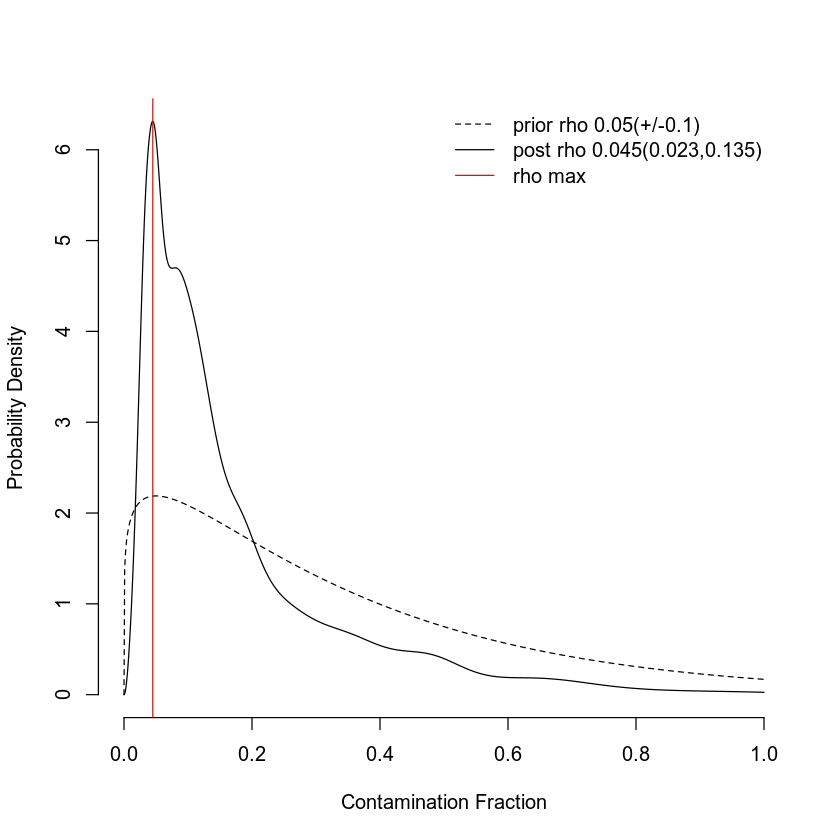

Warning message in sparseMatrix(i = out@i[w] + 1, j = out@j[w] + 1, x = out@x[w], :
“'giveCsparse' is deprecated; setting repr="T" for you”
Expanding counts from 11 clusters to 4936 cells.



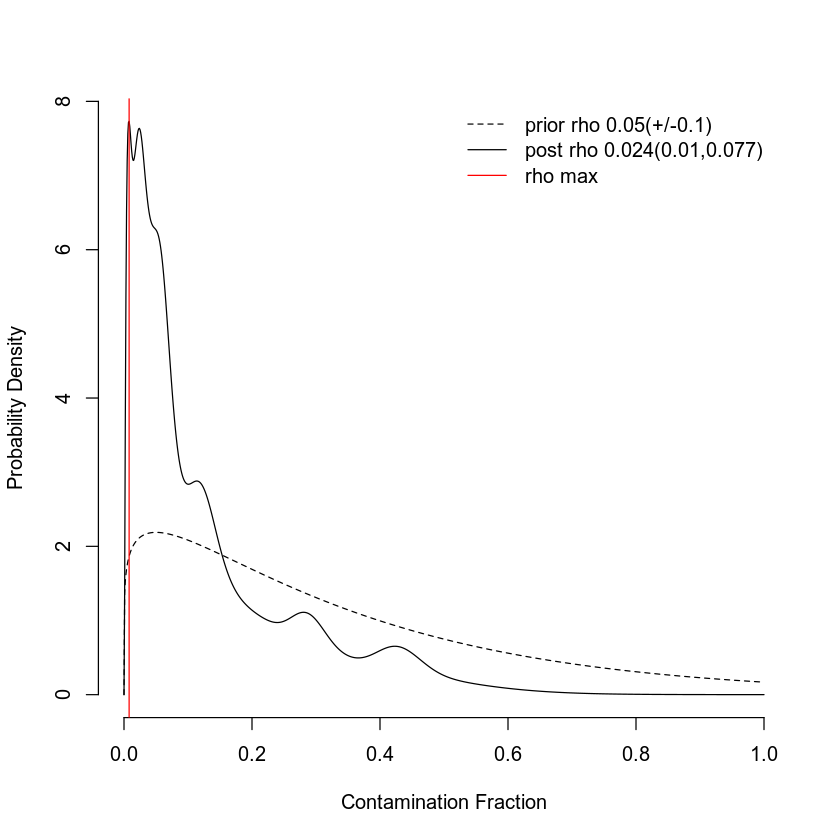

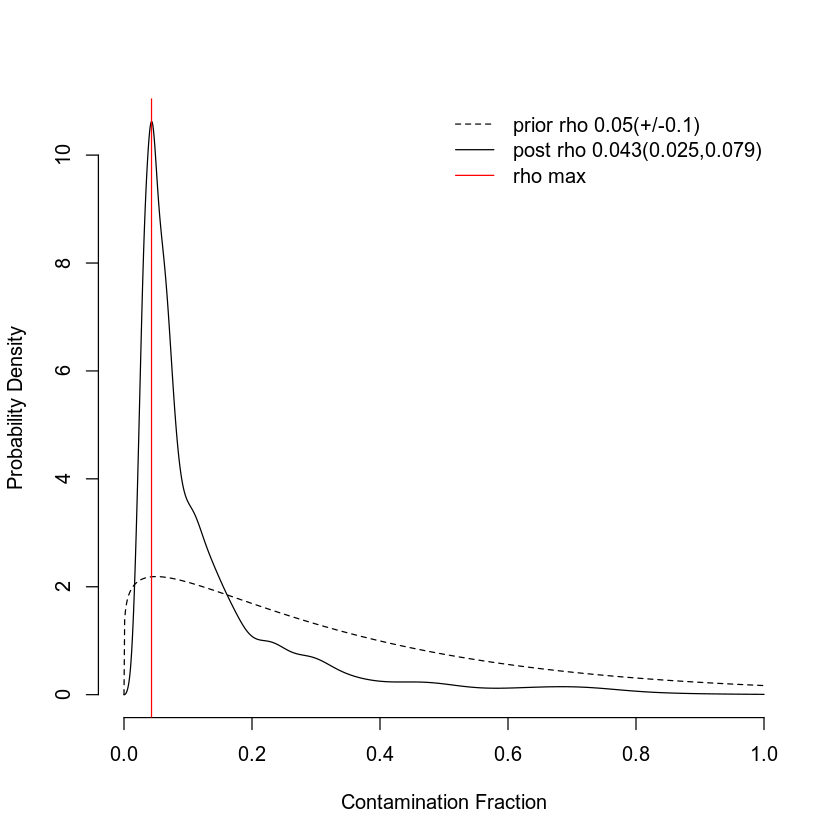

In [18]:
#Run SoupX with default settings
for (sample in 1:length(sample_folders)){
    
    sample_current = str_sub(sample_folders[sample], 1, 3)
    print(paste0("Analyzing sample: ", sample_folders[sample]))
    load.dir = paste0(input.dir, sample_folders[sample], "/outs/")
    
    sample_data = load10X(load.dir)
    sample_data = autoEstCont(sample_data)
    outsample_data = adjustCounts(sample_data)

    sample_data$soupProfile[order(sample_data$soupProfile$est, decreasing = TRUE), ] %>%
        write.csv(., paste0(sample_folders[sample], "_Top_Soup_Genes.csv"))

    saveRDS(outsample_data, paste0("001_SoupX_corrected_counts/", sample_current, "_SoupX_adjustedCounts.rds"))
    
}

### Use DropletUtils to save SoupX output as folder to load into Scrublet

In [39]:
SoupX_counts = list.files("001_SoupX_corrected_counts/", pattern = ".rds")
SoupX_counts

[1] "JK1_SoupX_adjustedCounts.rds" "JK2_SoupX_adjustedCounts.rds"
[3] "JK3_SoupX_adjustedCounts.rds" "JK4_SoupX_adjustedCounts.rds"
[5] "JK5_SoupX_adjustedCounts.rds" "JK6_SoupX_adjustedCounts.rds"
[7] "JK7_SoupX_adjustedCounts.rds" "JK8_SoupX_adjustedCounts.rds"

In [40]:
#Done manually per sample

for (each in SoupX_counts[8]){
    sample_now = str_sub(each, 1, 3)
    print(sample_now)
    count.obj = readRDS(paste0("./001_SoupX_corrected_counts/", each))
    
    DropletUtils::write10xCounts(count.obj, path = paste0("./001_SoupX_outputs_for_scrublet/", sample_now, "_SoupX_for_Scrublet"))

}

[1] "JK8"
